<H3>
    <P>XỬ LÝ ẢNH VÀ THỊ GIÁC MÁY TÍNH - 2019</P>
    <P>LÊ NGUYỄN SƠN NGUYÊN - CH1702039</P>
    <P>XỬ LÝ ẢNH NHIỄU SỐ 1</P>
</H3>

import các thư viện cần thiết

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.dpi'] = 500

đọc hình ảnh và show hình bị nhiễu

In [4]:
img = cv2.imread('./Anh nhieu/1n.jpg', 0)

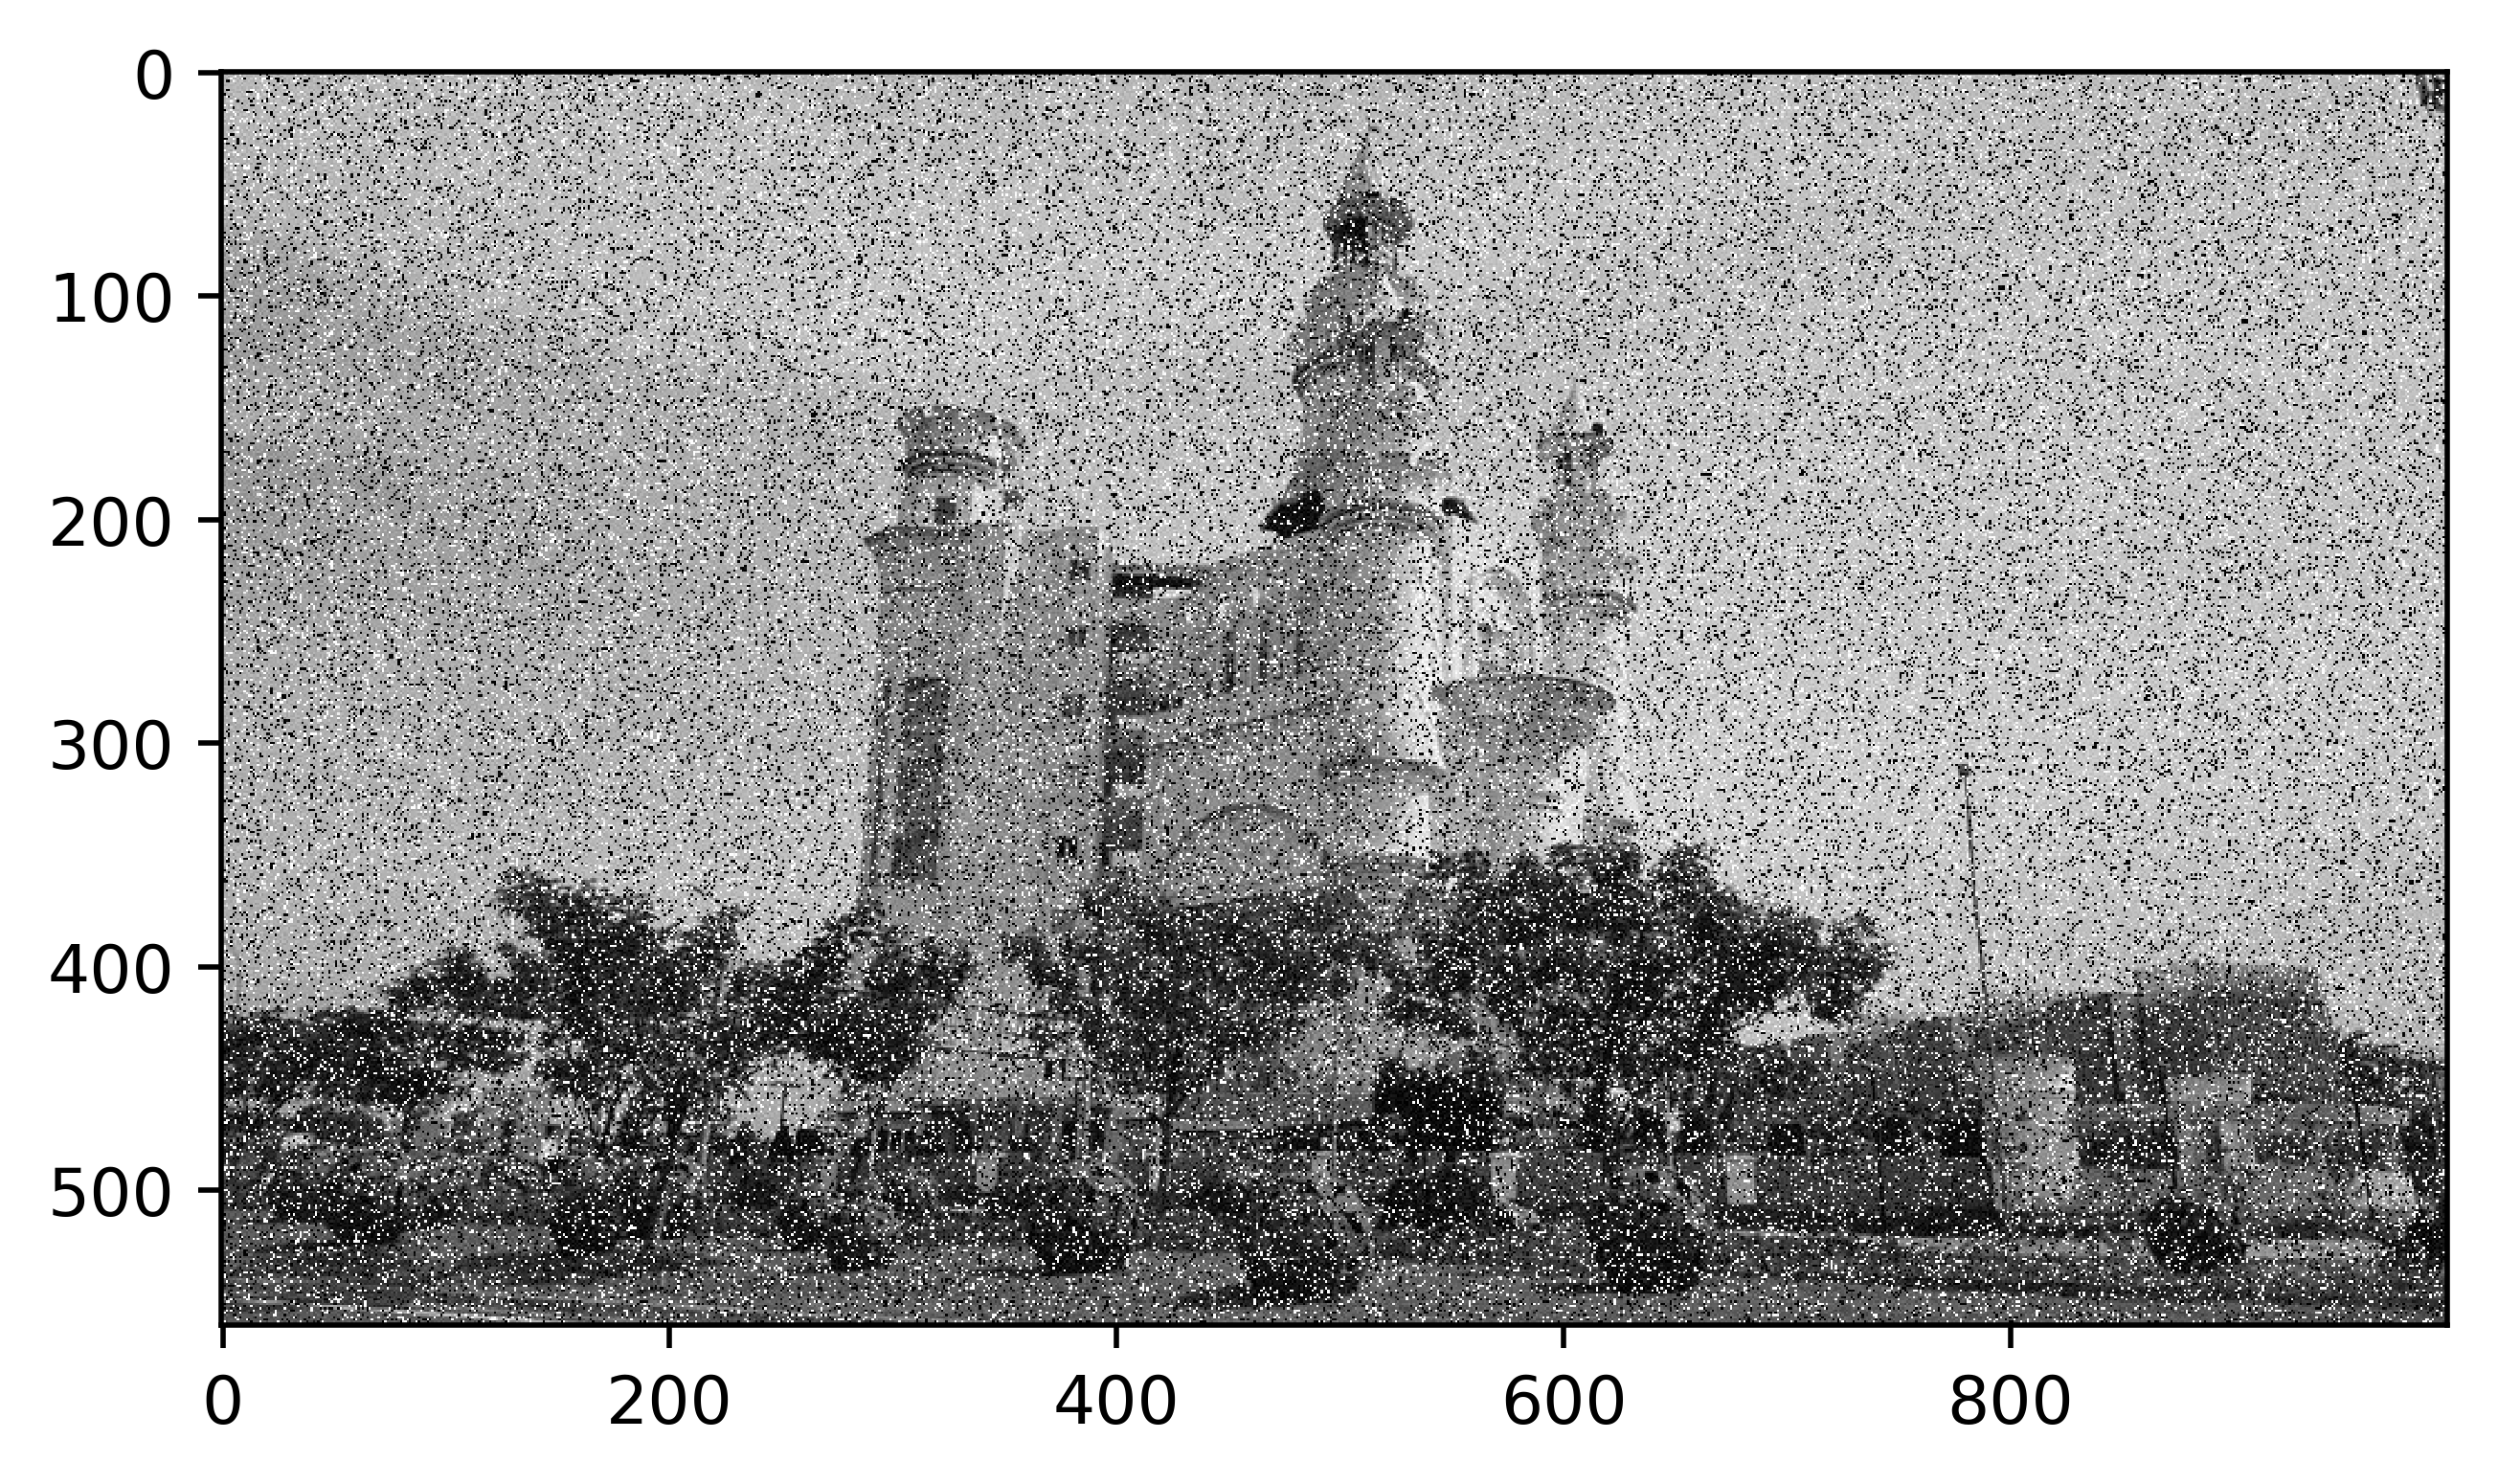

In [5]:
plt.imshow(img, cmap='gray')

CHUYỂN ẢNH VỀ MIỀN TẦN SỐ ĐỂ KIỂM TRA

In [6]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum = np.asarray(magnitude_spectrum, dtype=np.uint8)

img_and_magnitude = np.concatenate((img, magnitude_spectrum), axis=1)

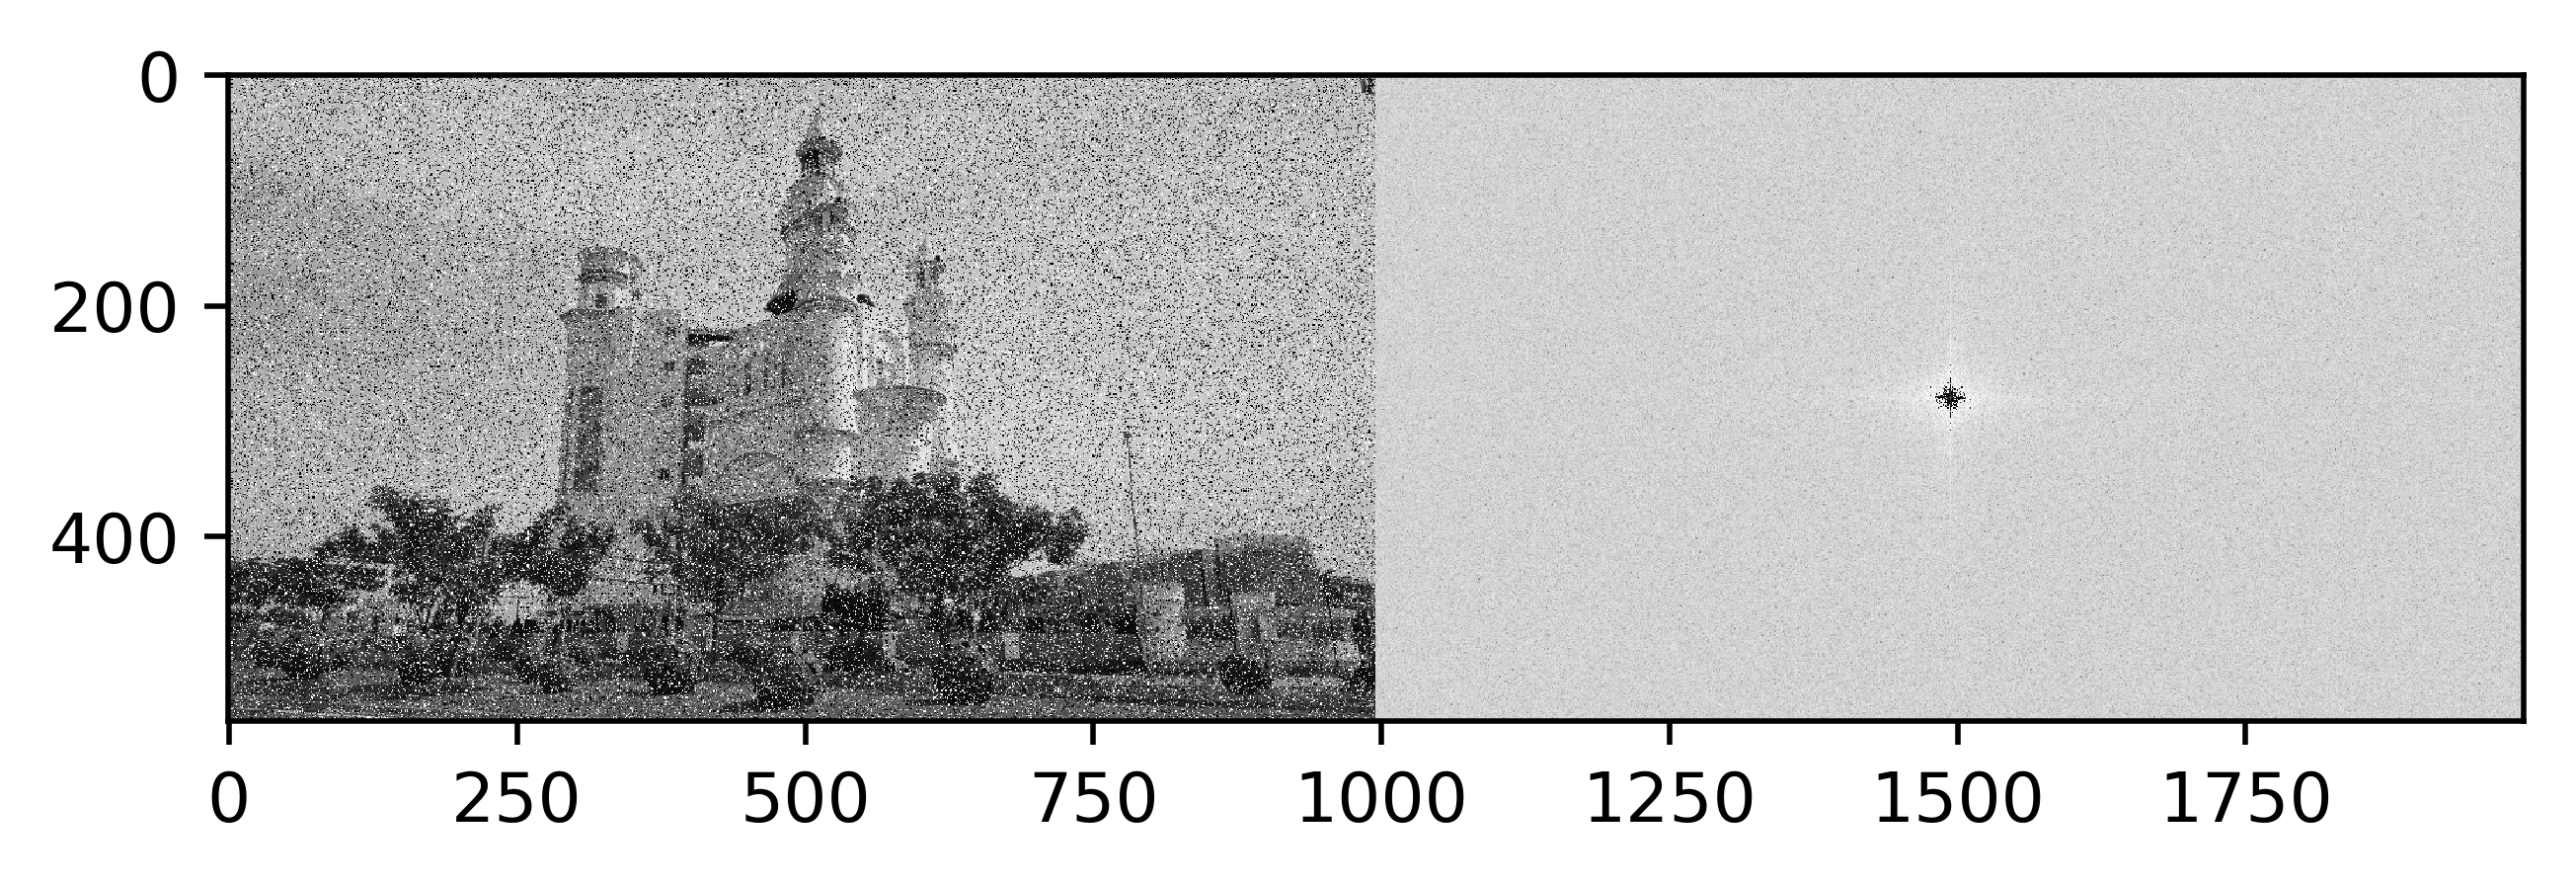

In [7]:
plt.imshow(img_and_magnitude, cmap='gray')

thử chuyển về miền tần số xem có bị nhiễu trên miền tần số hay không?!

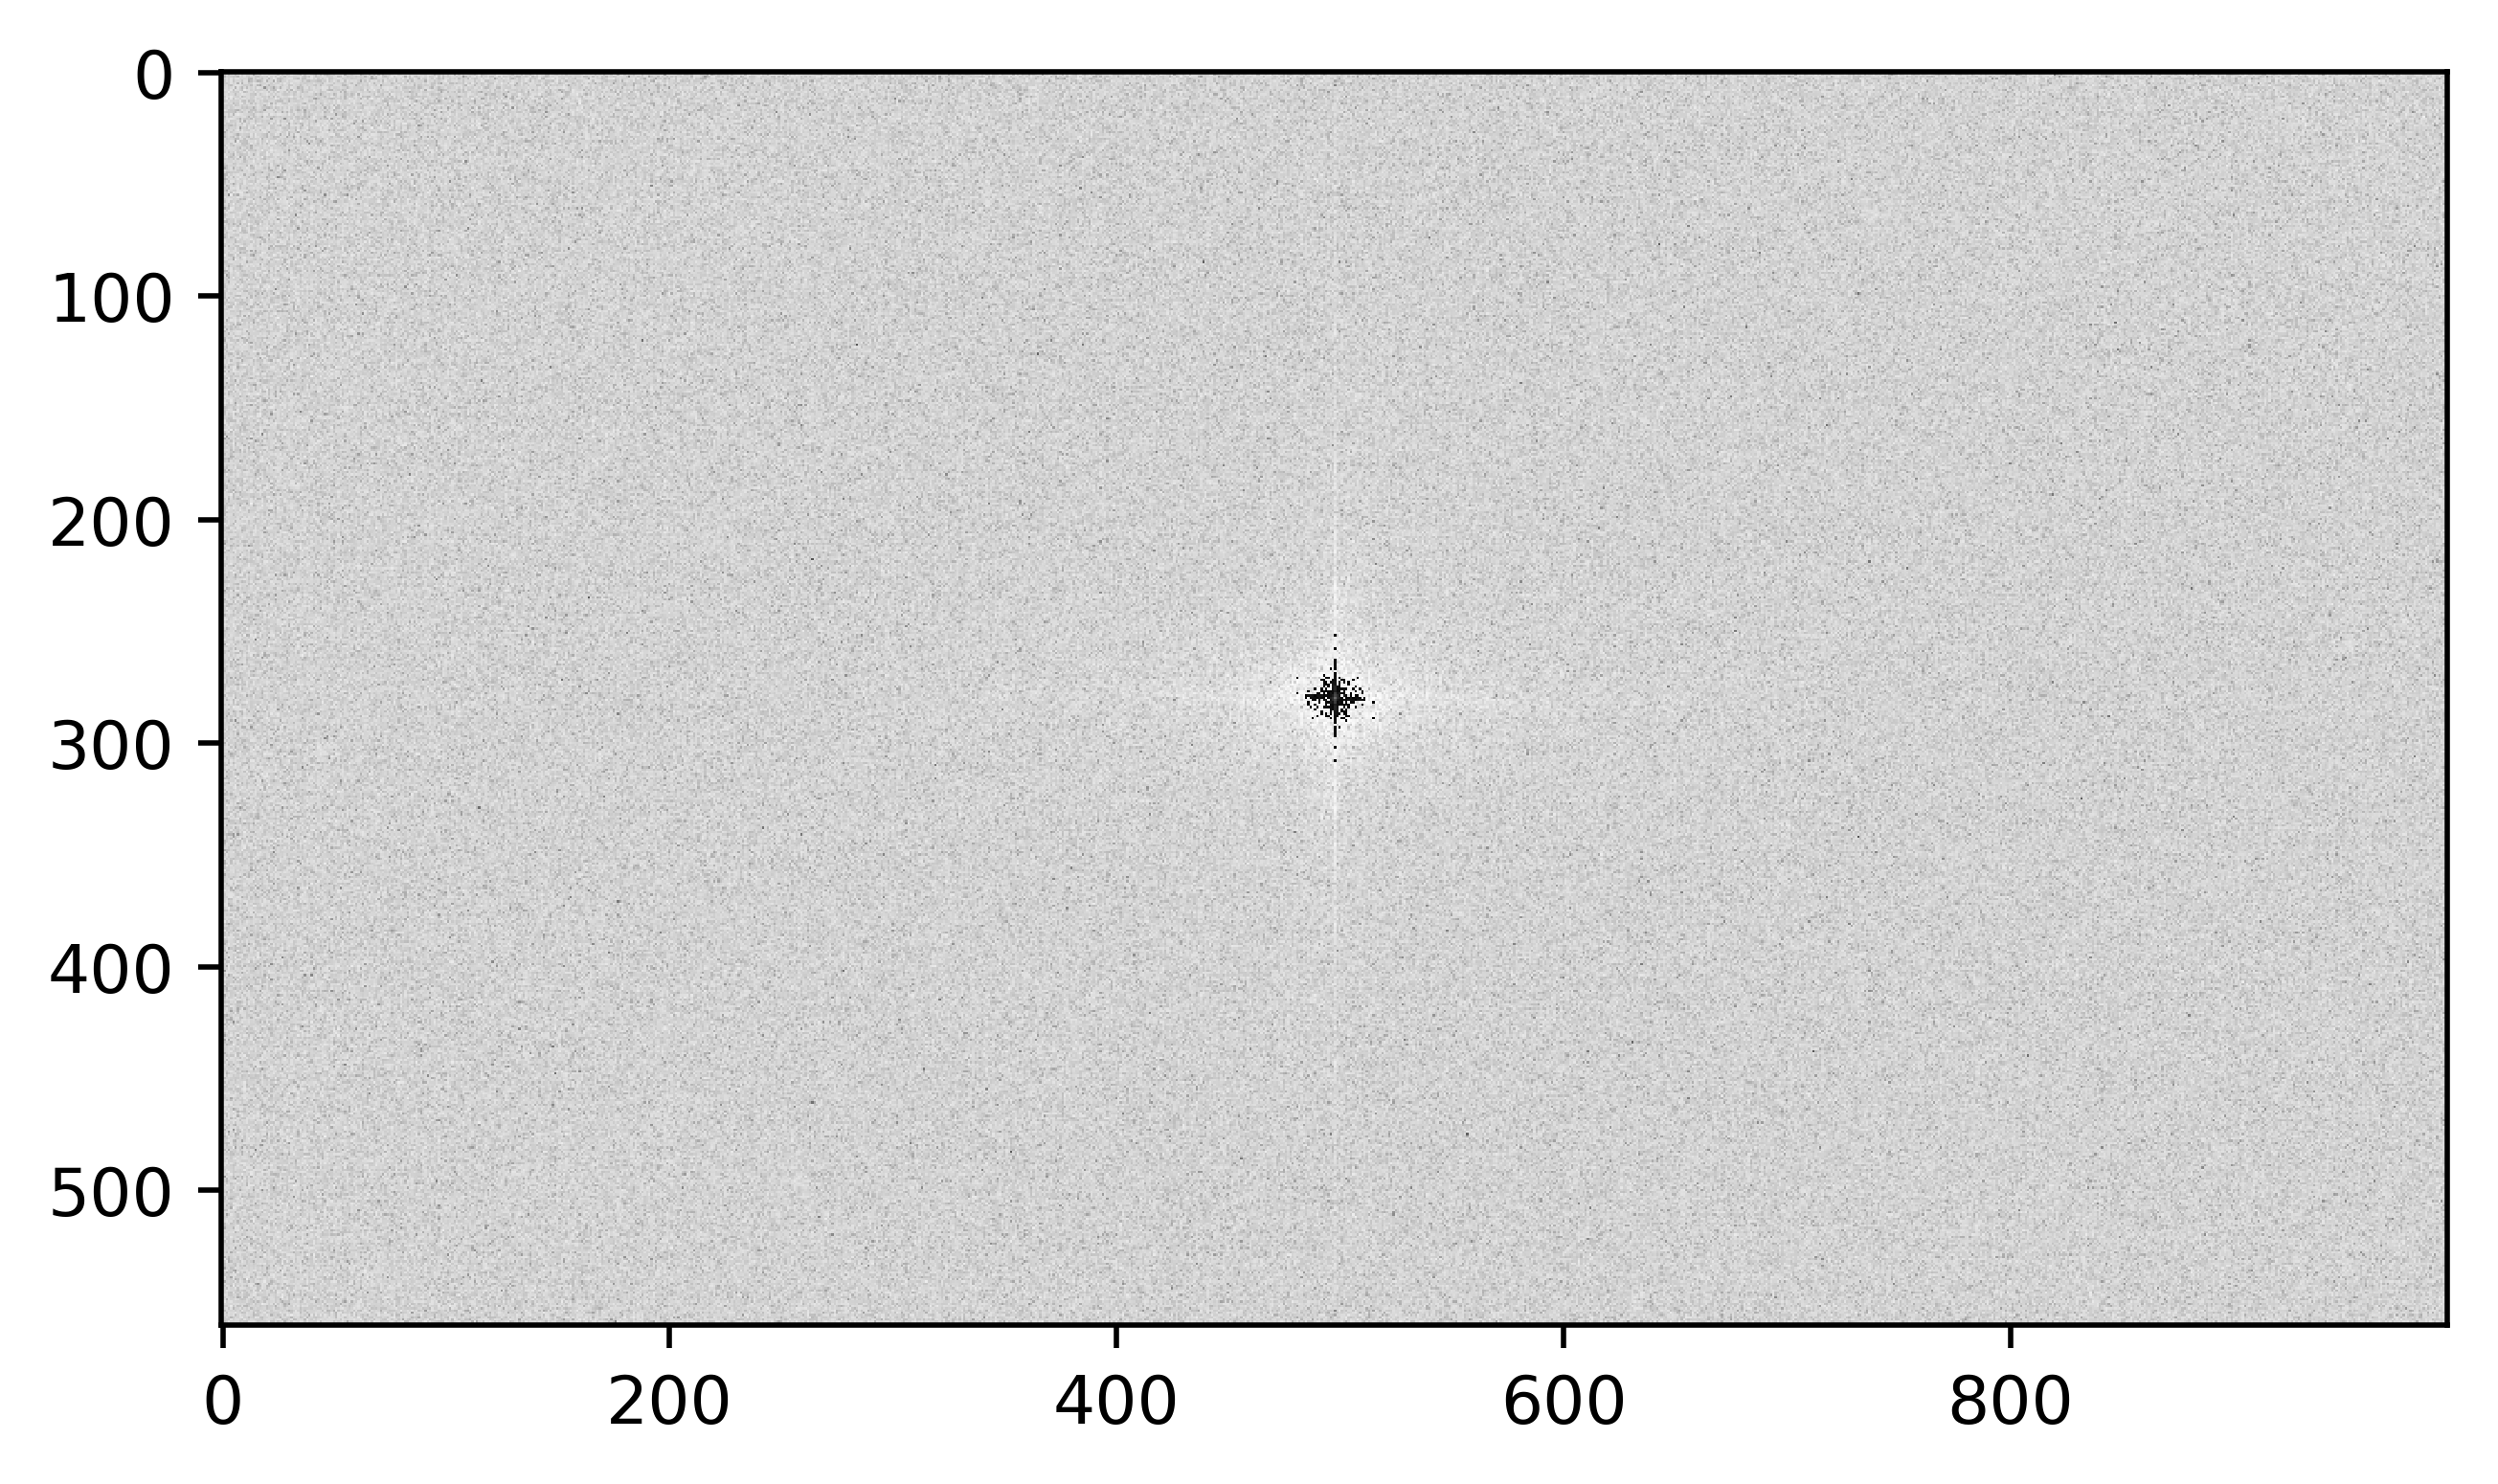

In [8]:
plt.imshow(magnitude_spectrum, cmap='gray')

lựa chọn một vùng ảnh đồng nhất TỪ ẢNH NHIỄU

In [9]:
img_crop = cv2.imread("./Anh nhieu/1c.jpg", 0)

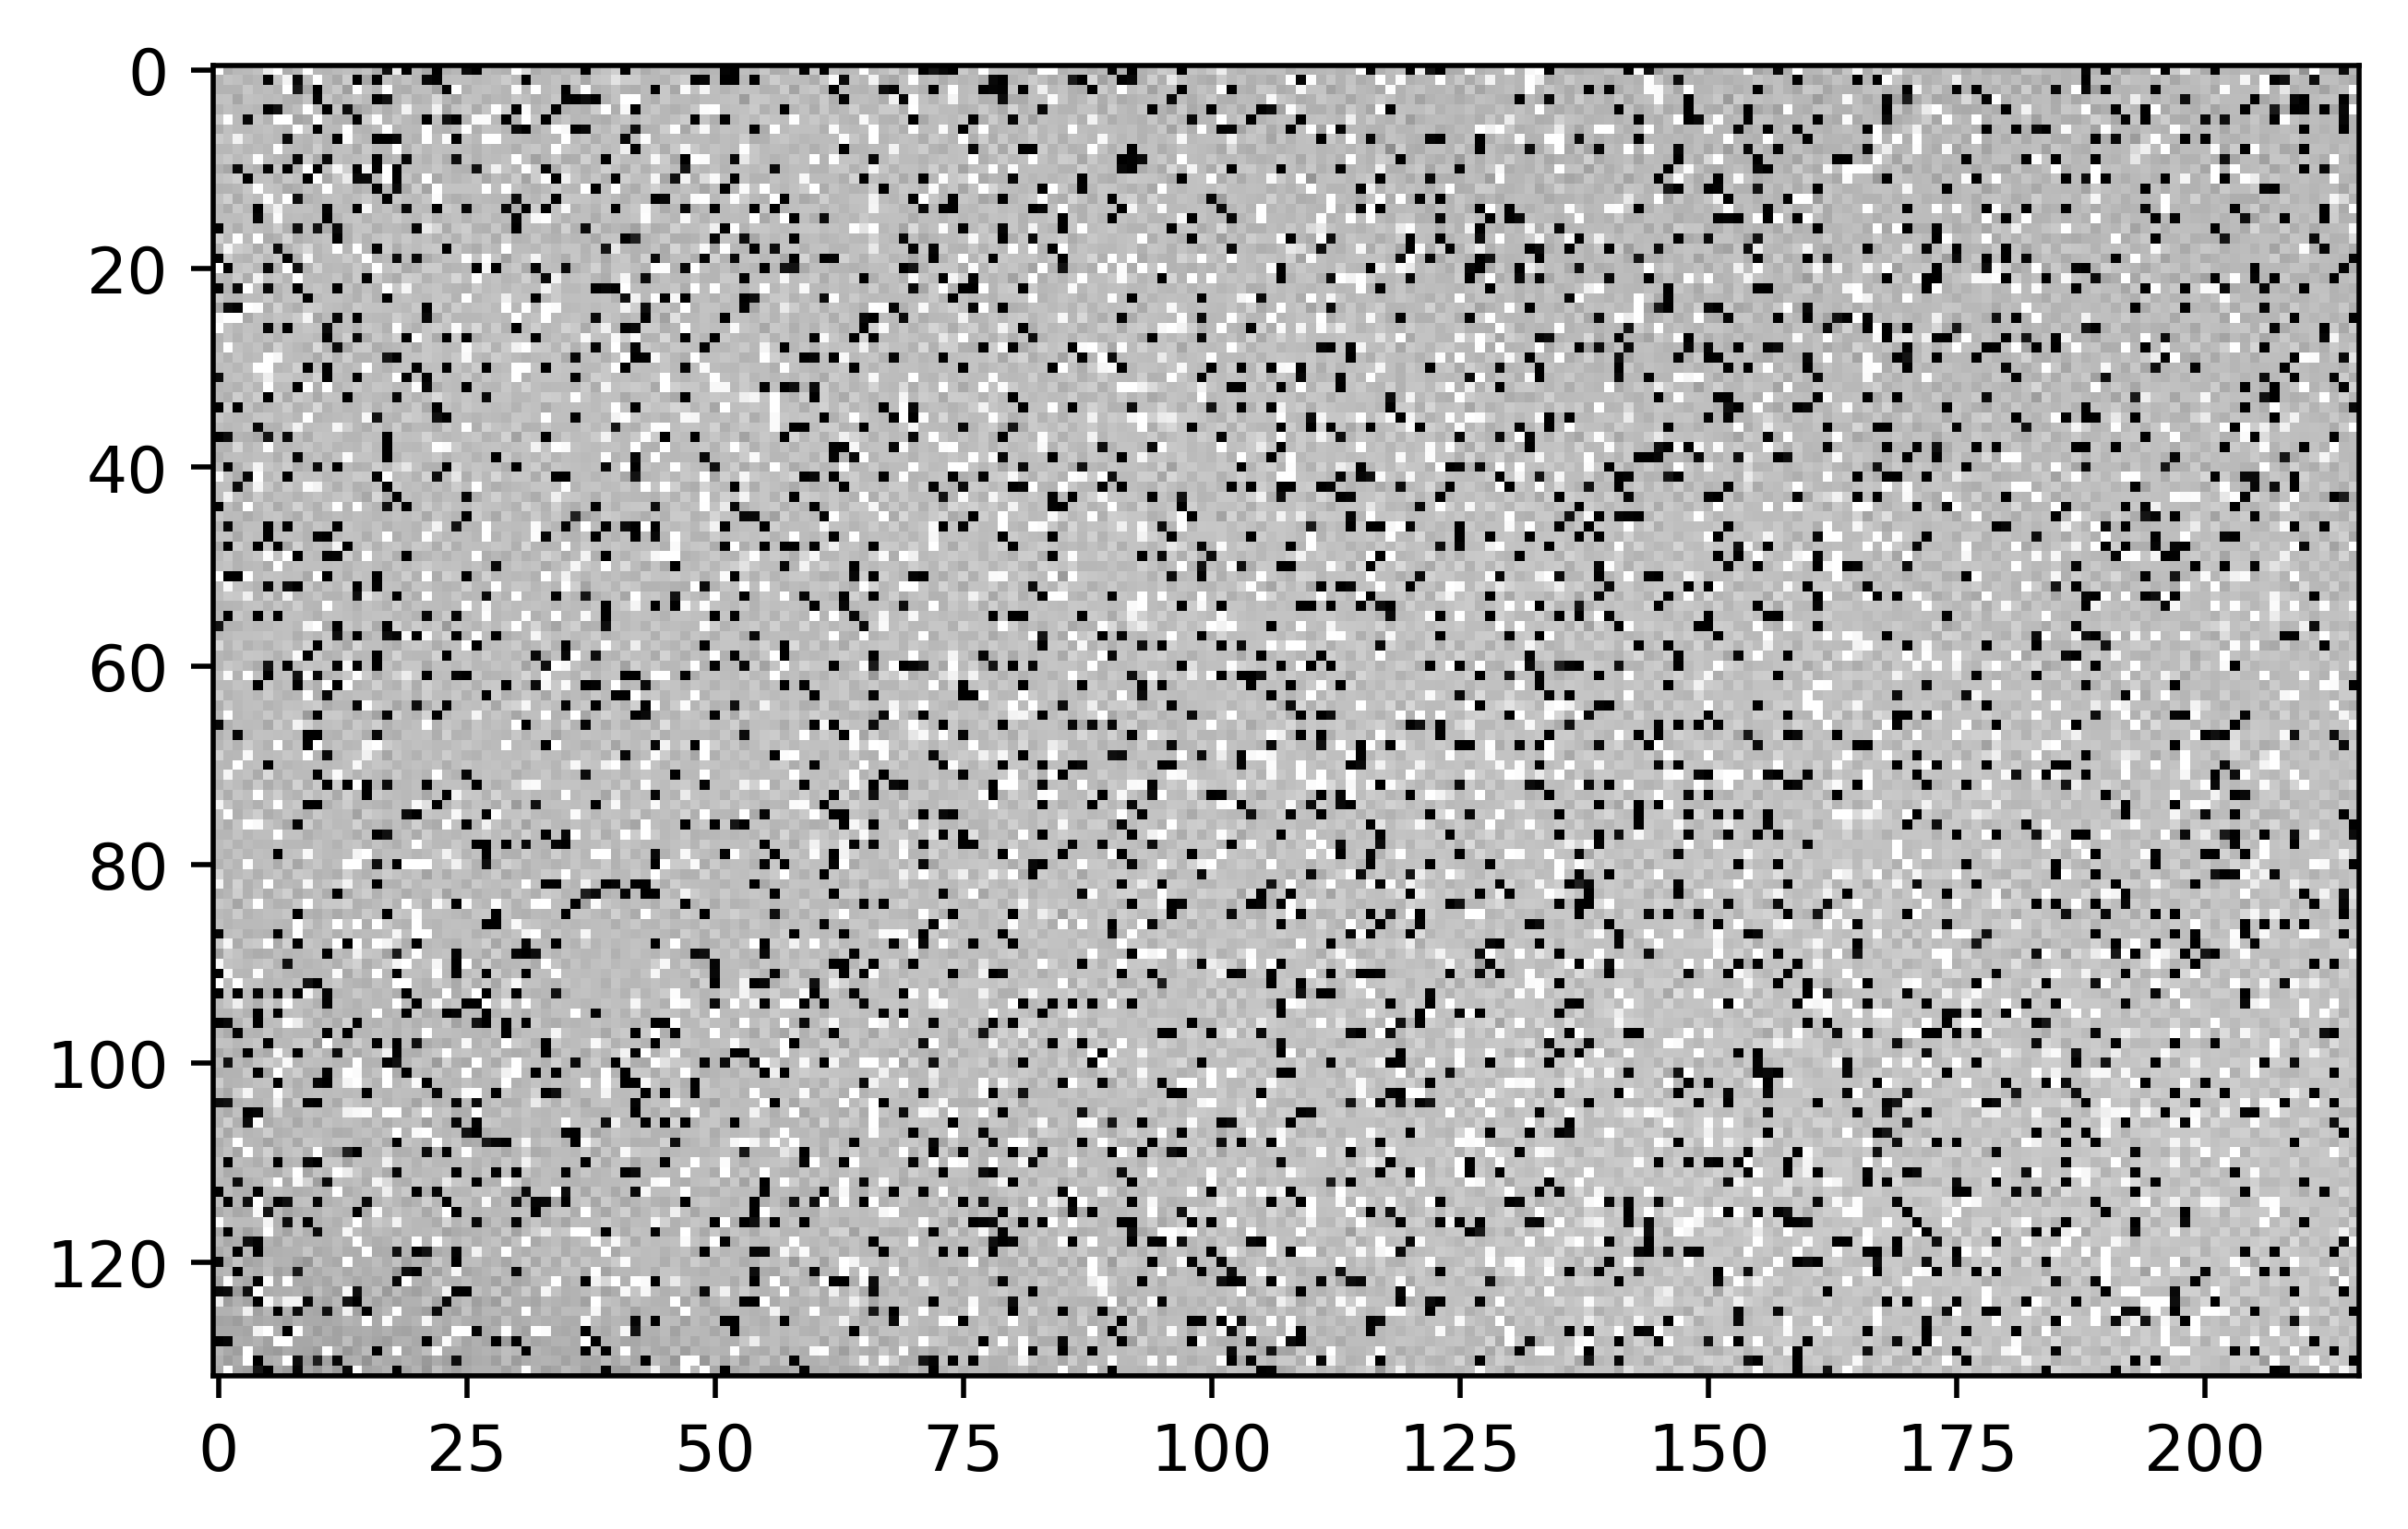

In [10]:
plt.imshow(img_crop, cmap='gray')

vẽ histogram

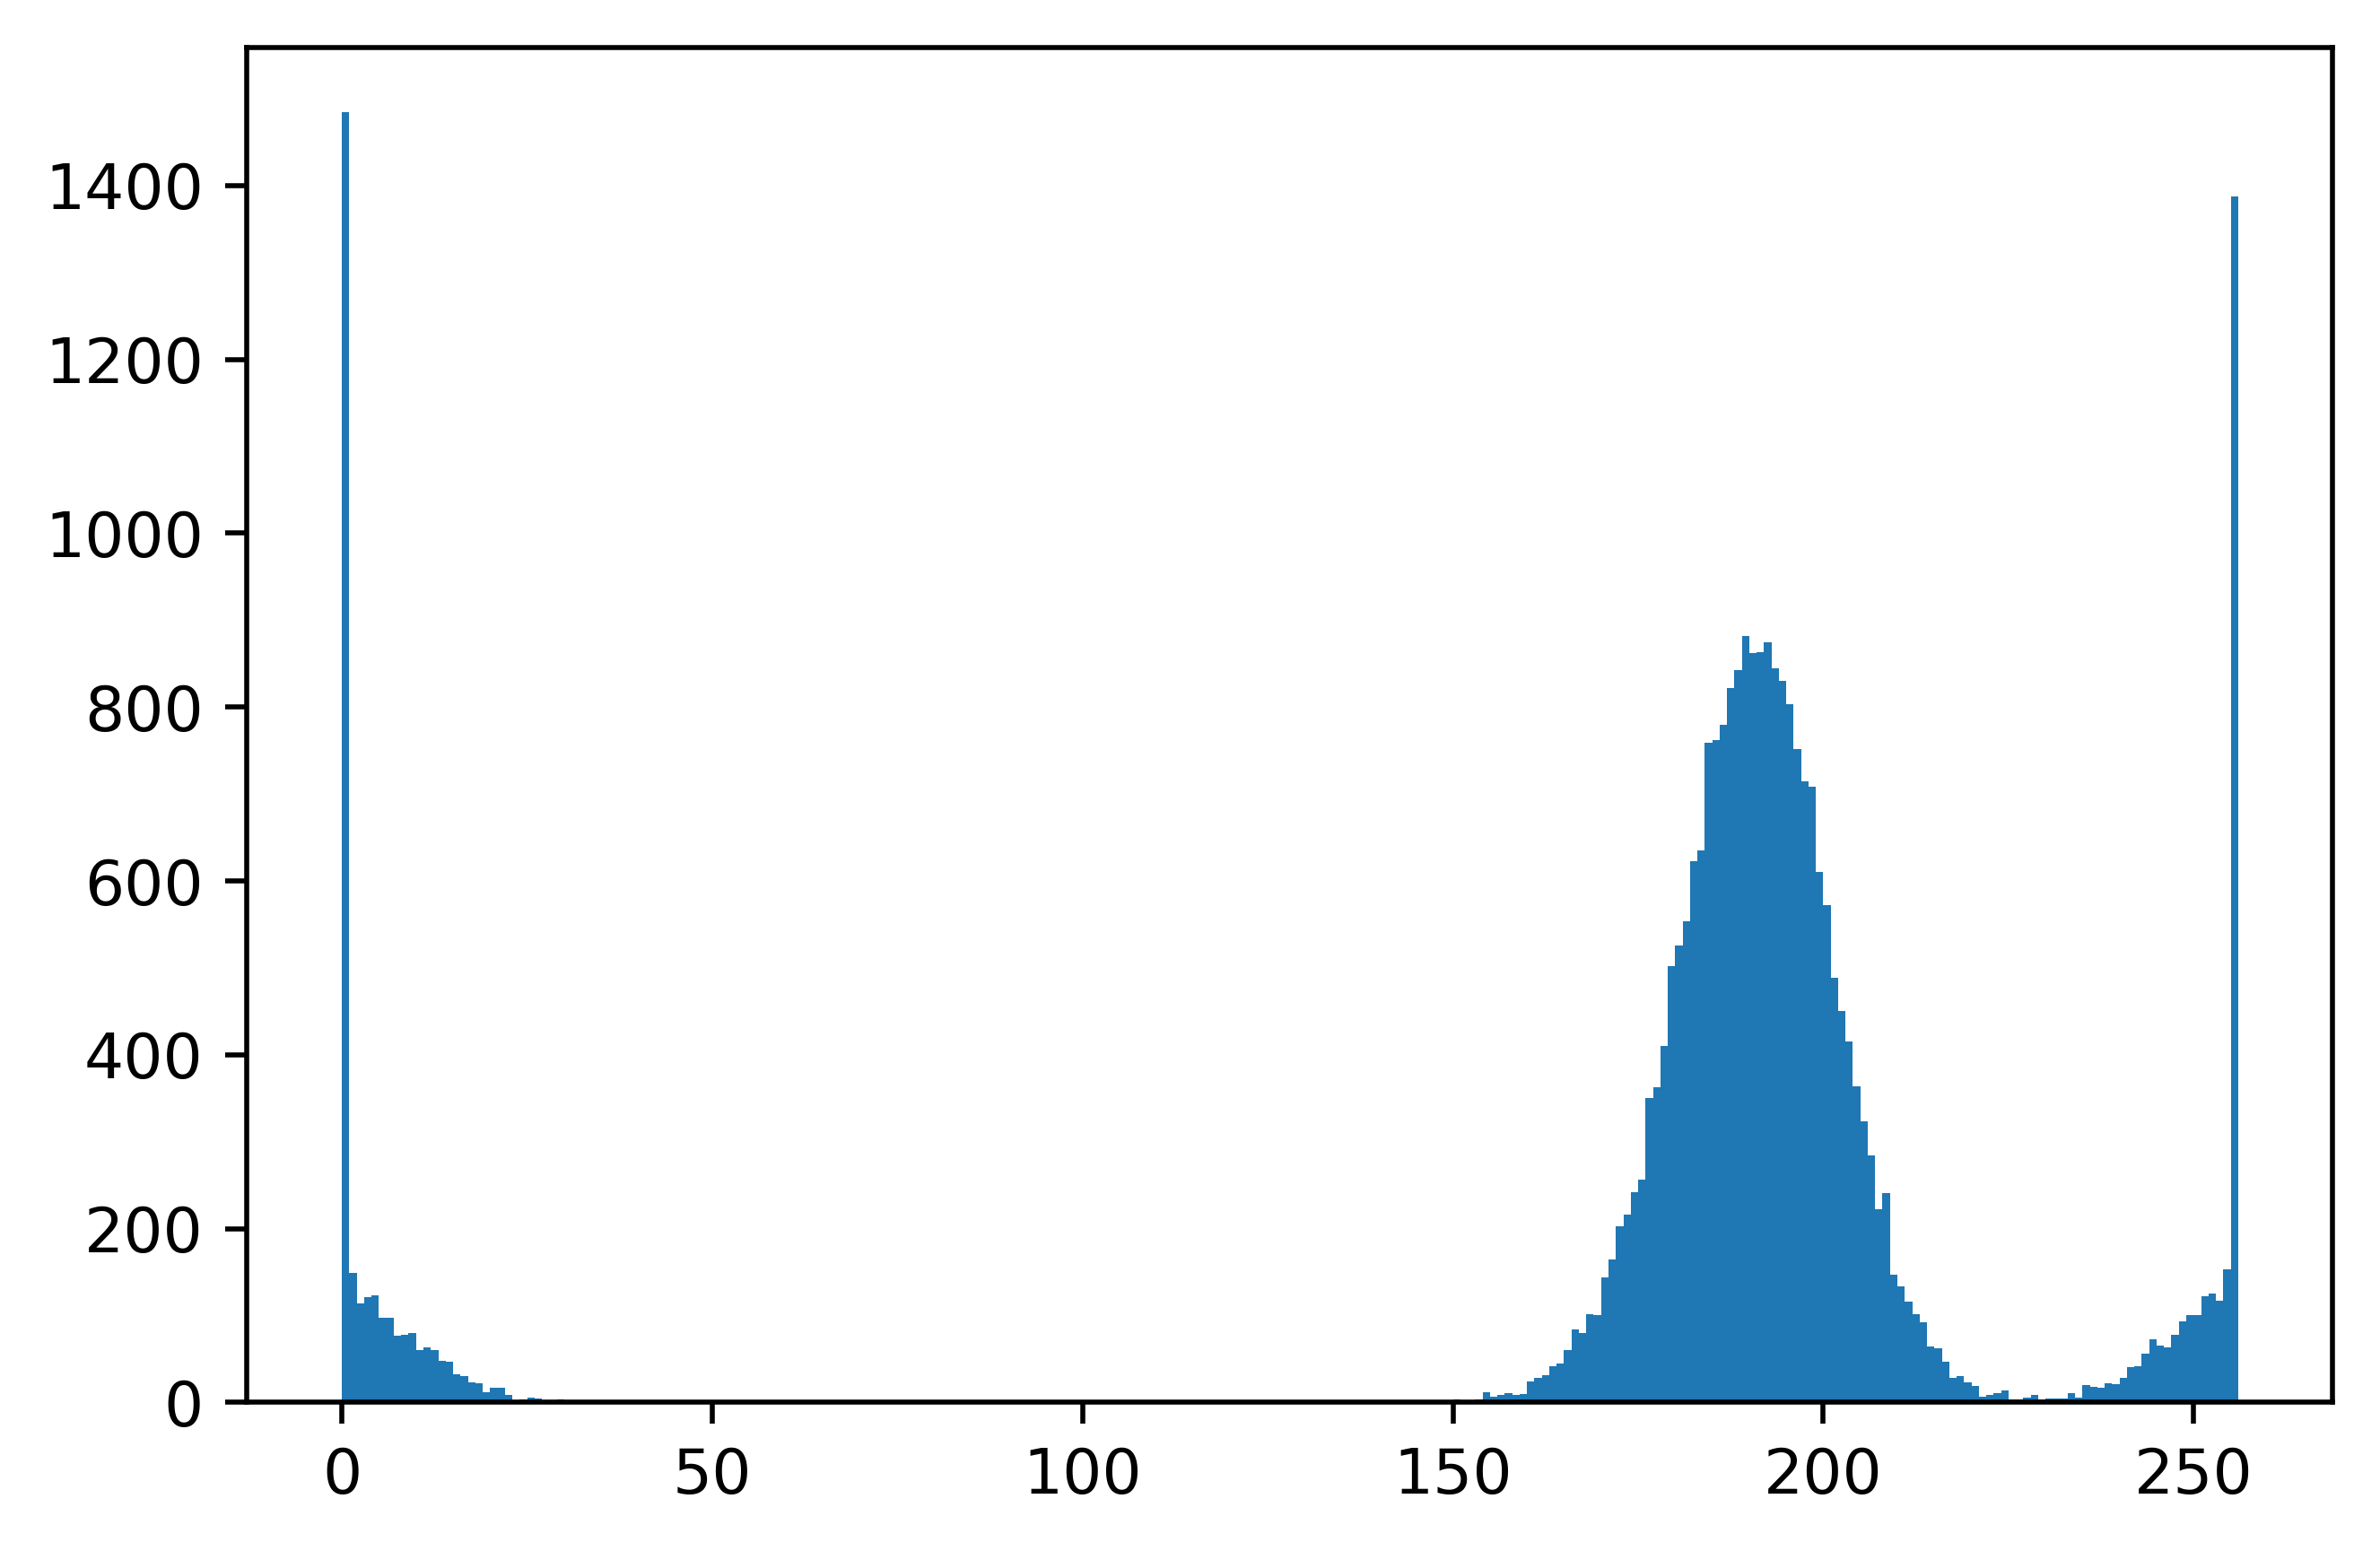

In [11]:
plt.hist(img_crop.ravel(), 256, [0, 256])
plt.show()

xác định được loại nhiễu là muối + tiêu
áp dụng bộ lọc median

In [12]:
median = cv2.medianBlur(img, 3)

ẢNH KẾT QUẢ SAU KHI QUA BỘ LỌC MEDIAN - THAM SỐ LÀ 3

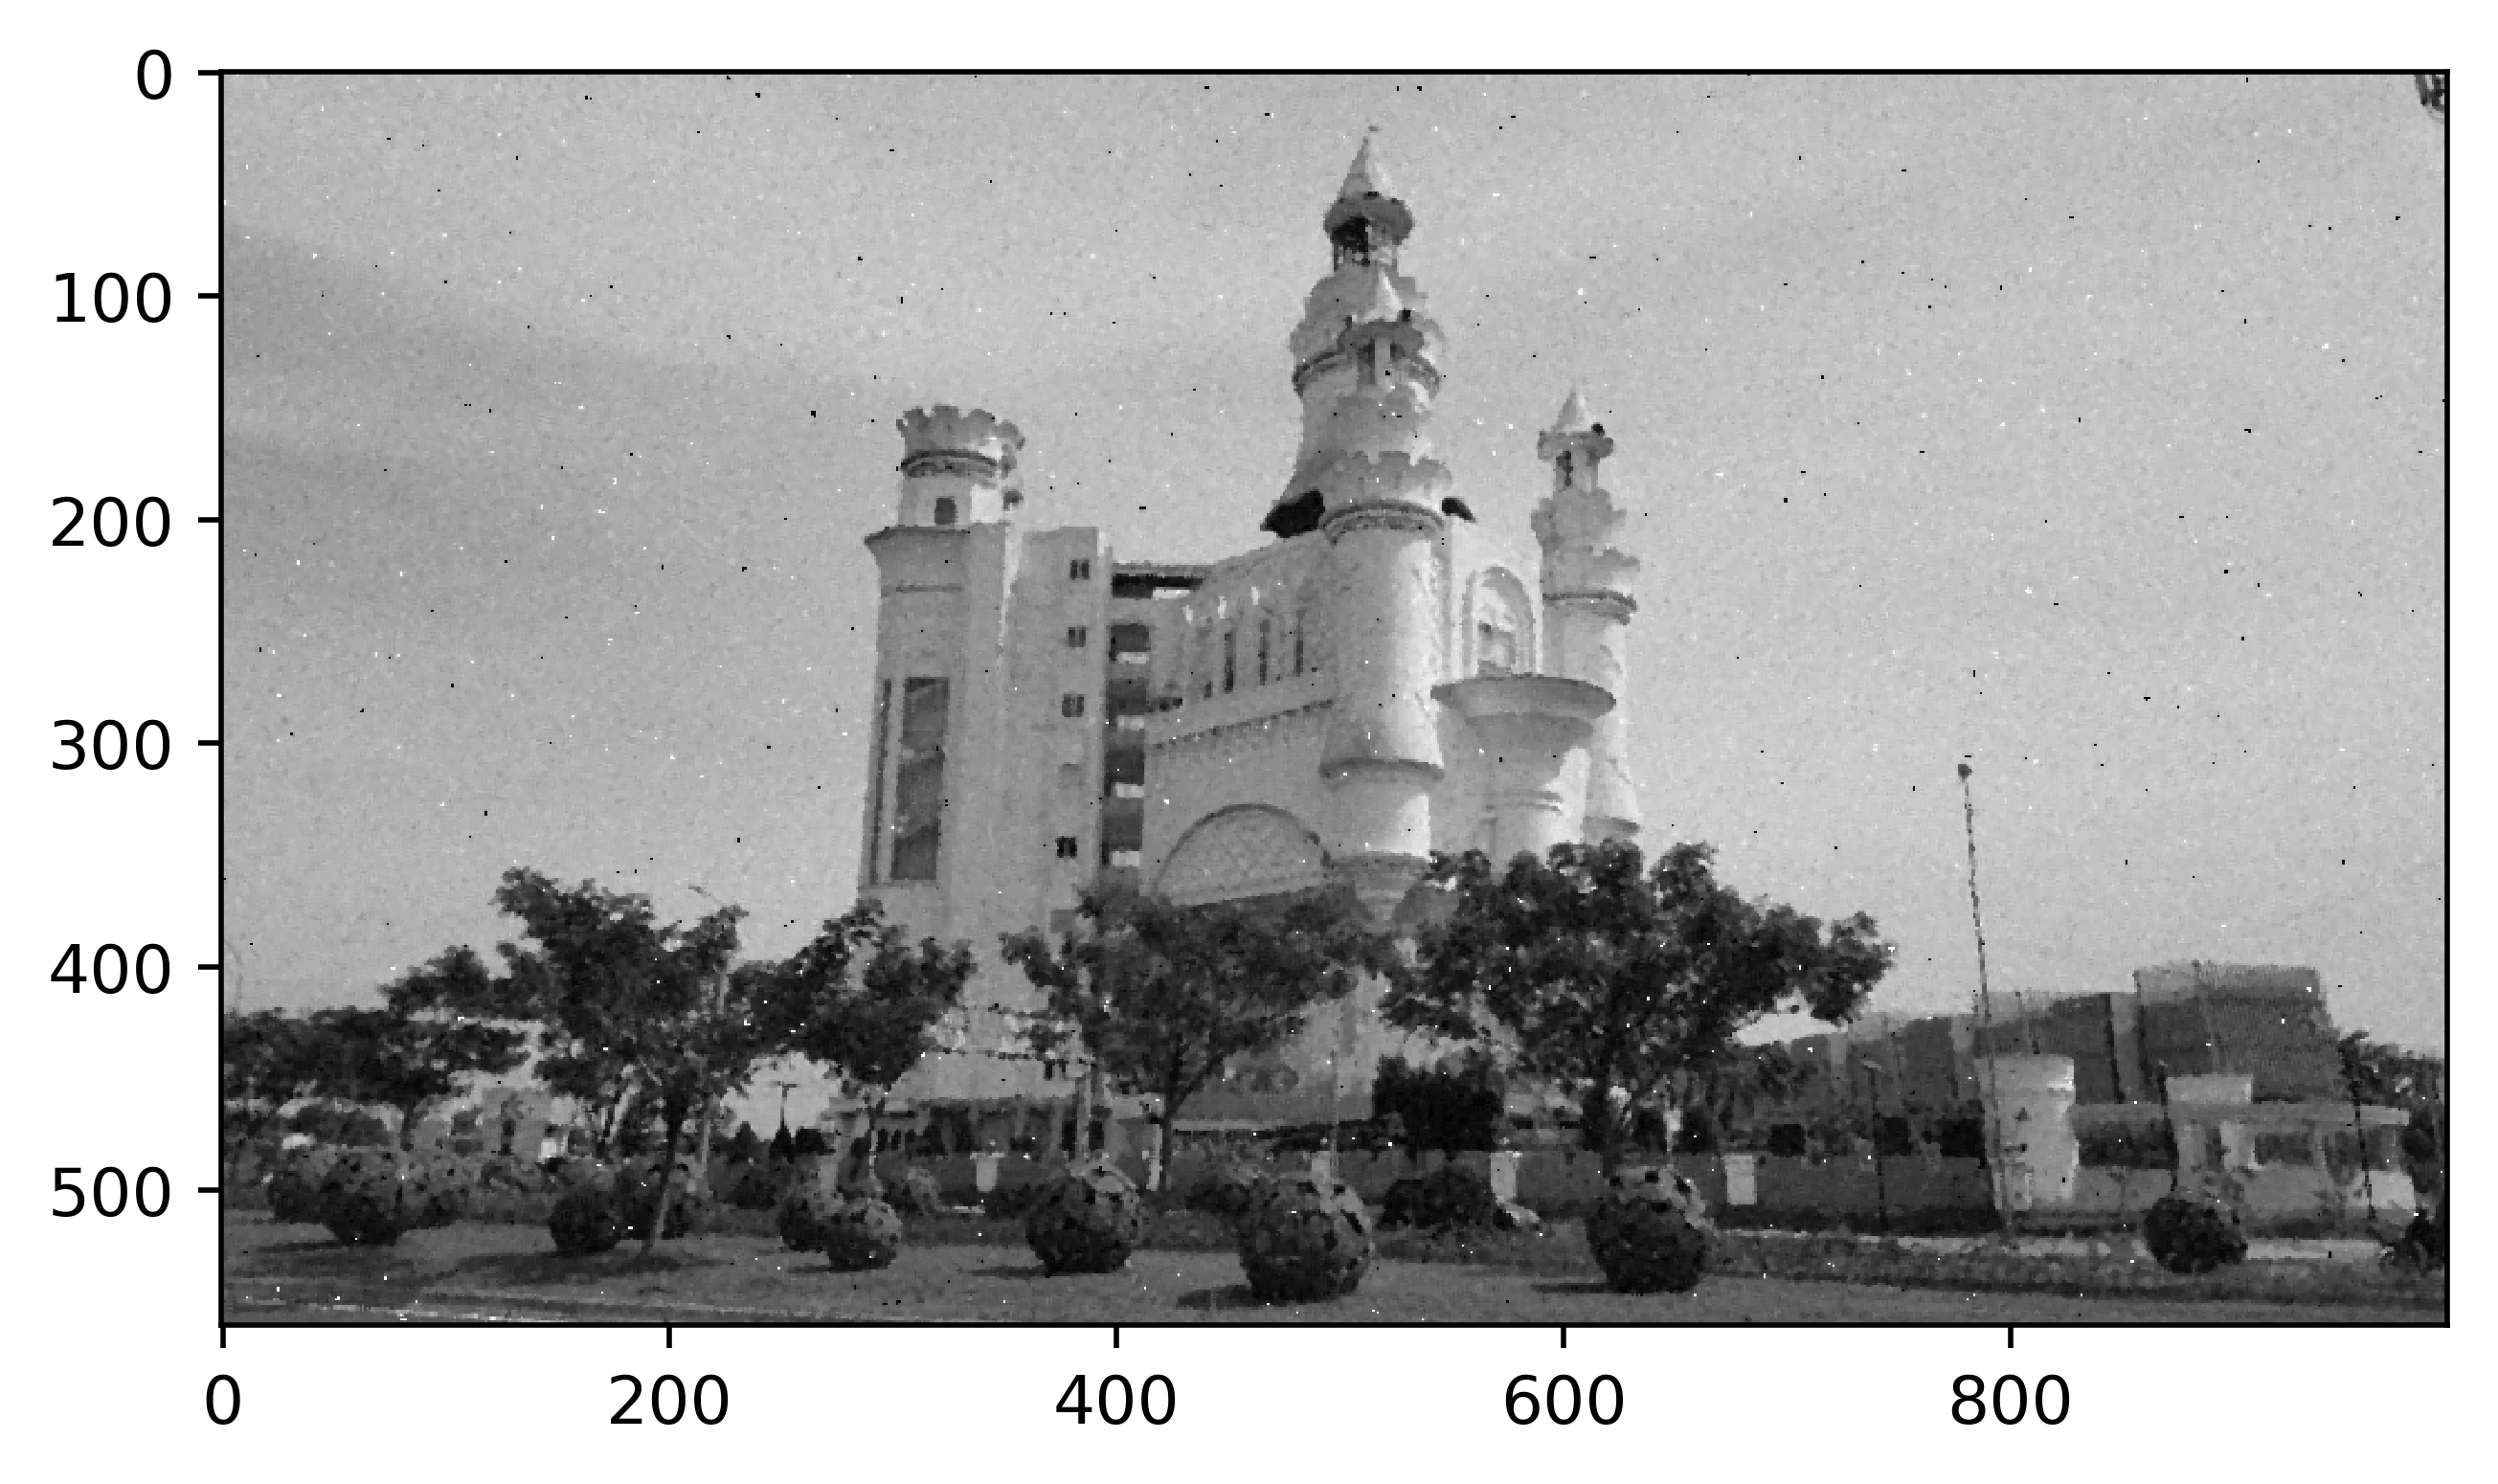

In [13]:
plt.imshow(median, cmap='gray')

KHỬ NHIỄU GAUSSIAN

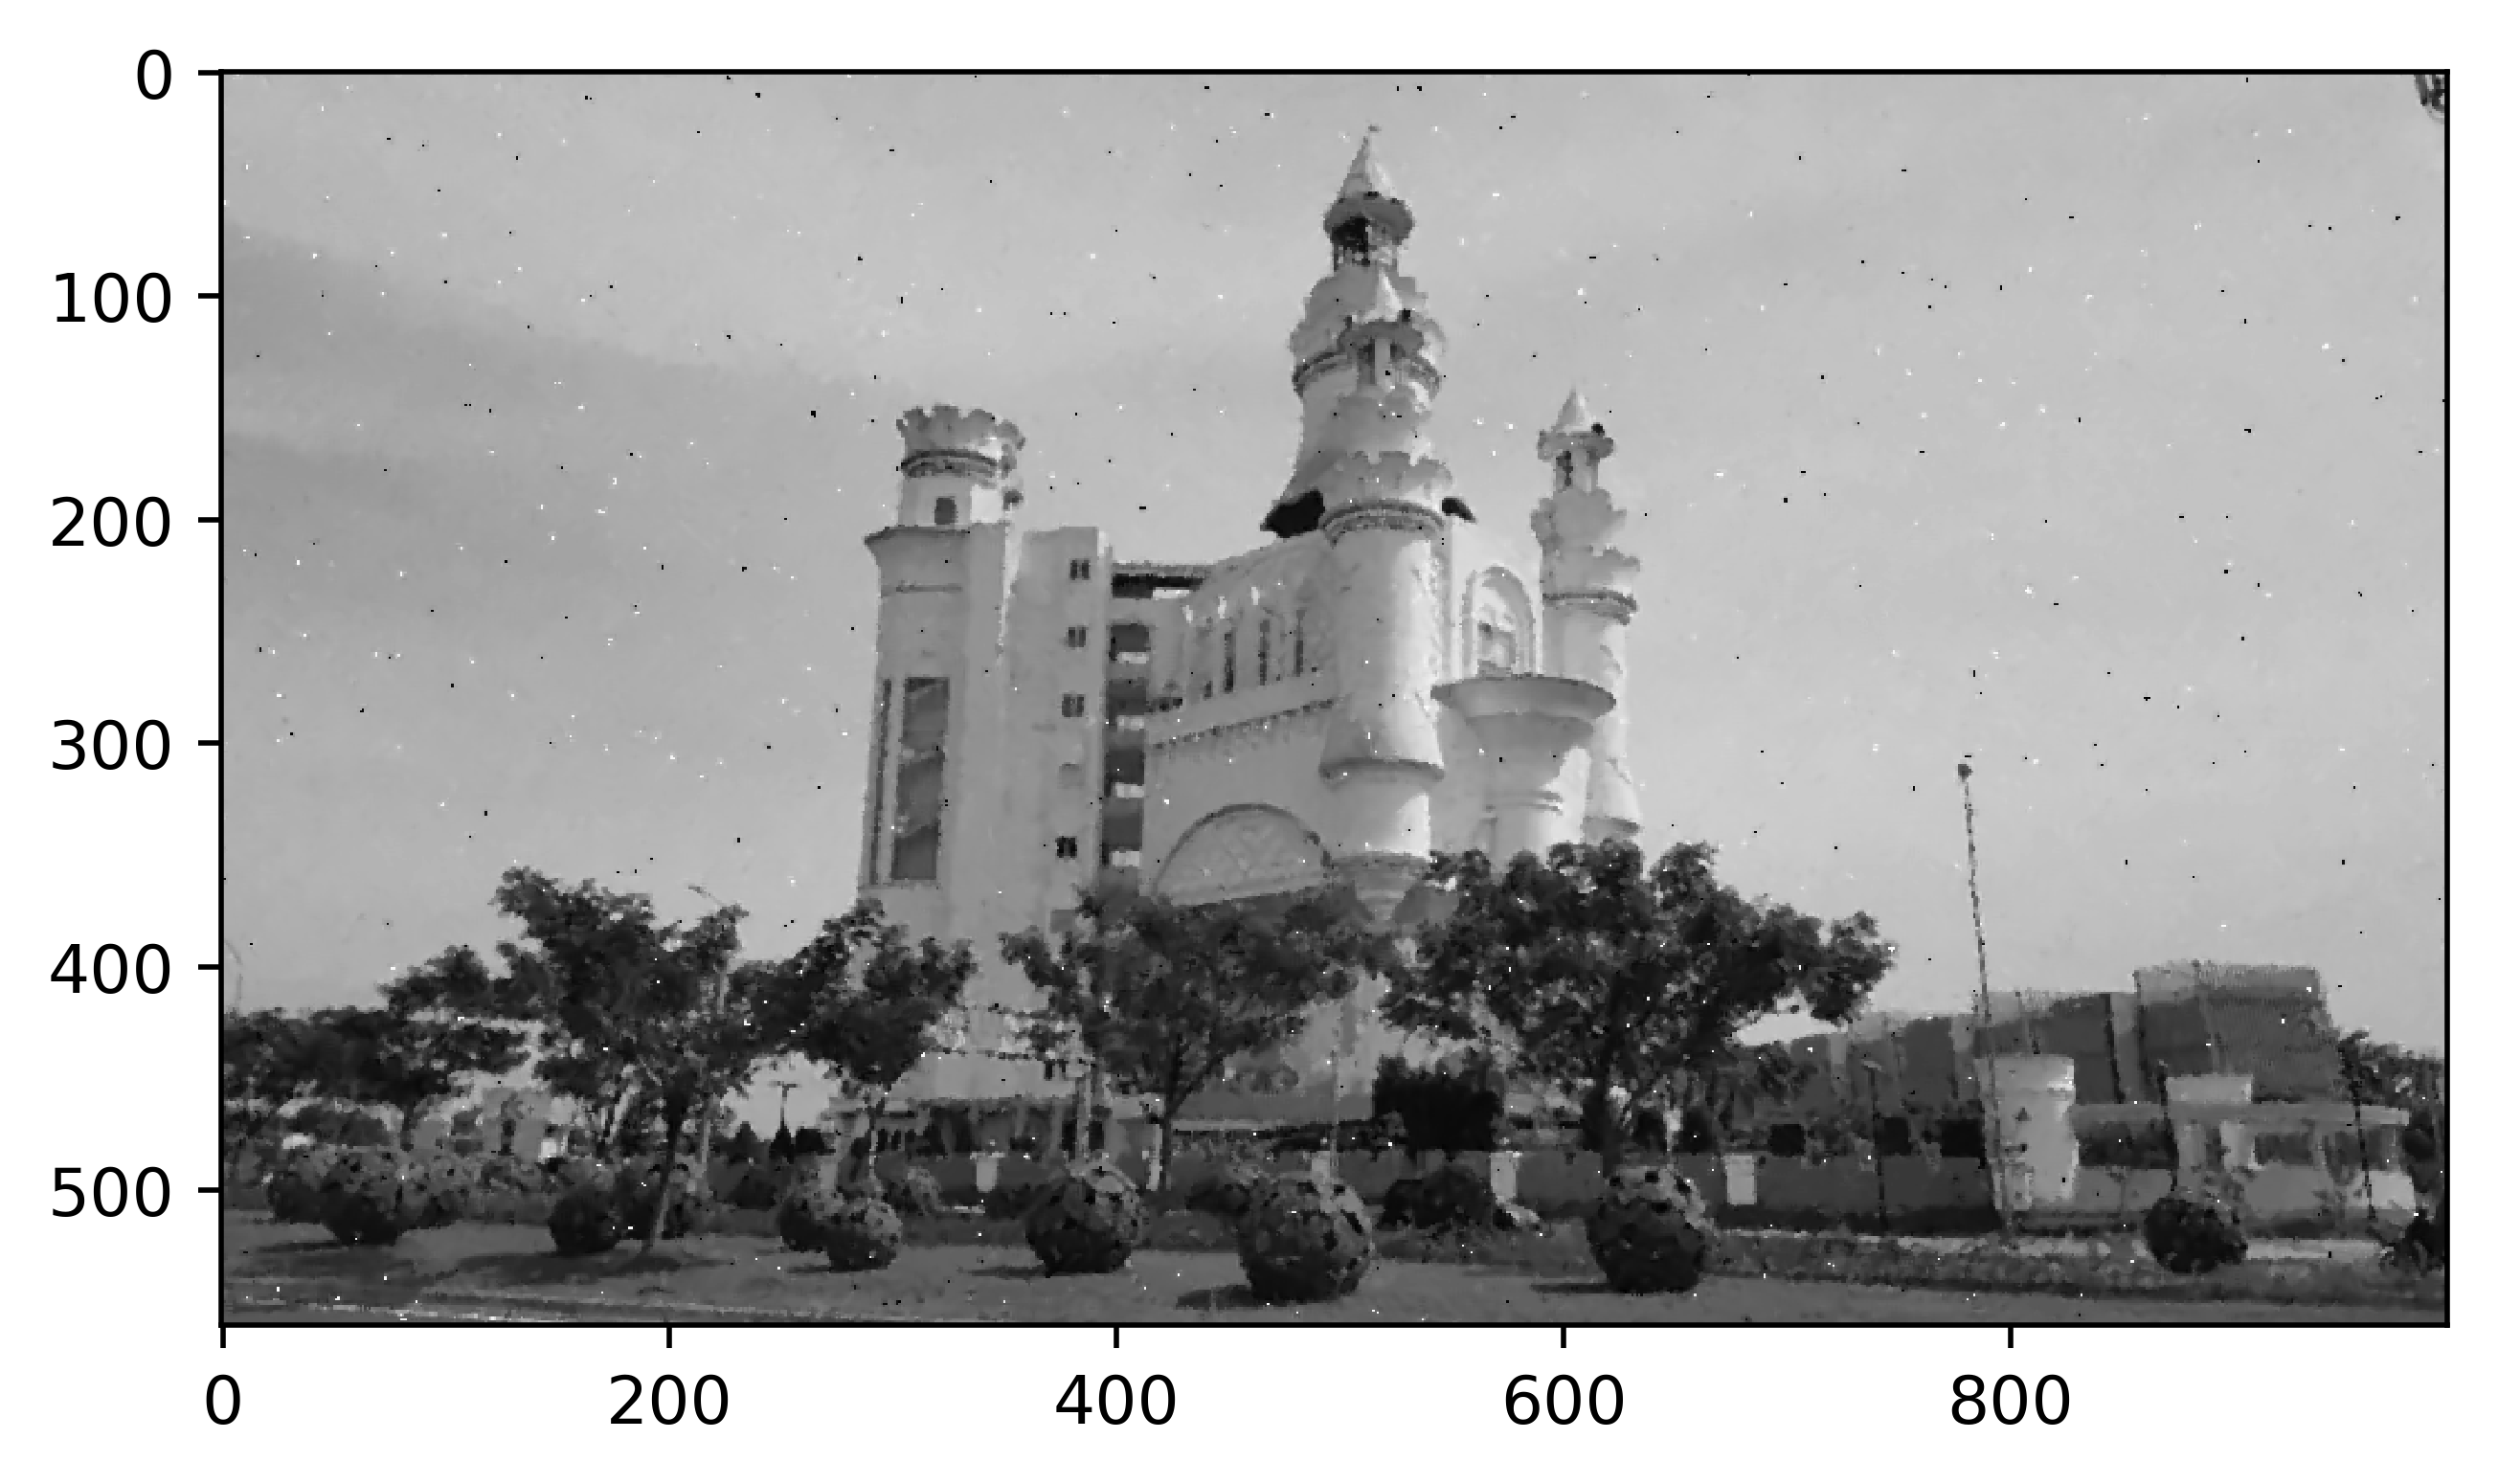

In [16]:
denoise = cv2.fastNlMeansDenoising(median, None, 5, 5, 15)
plt.imshow(denoise, cmap='gray')

In [17]:
cv2.imwrite('./Anh nhieu/1_r_median.jpg', denoise)

True

LOAD ẢNH GỐC VÀ TÍNH MSE

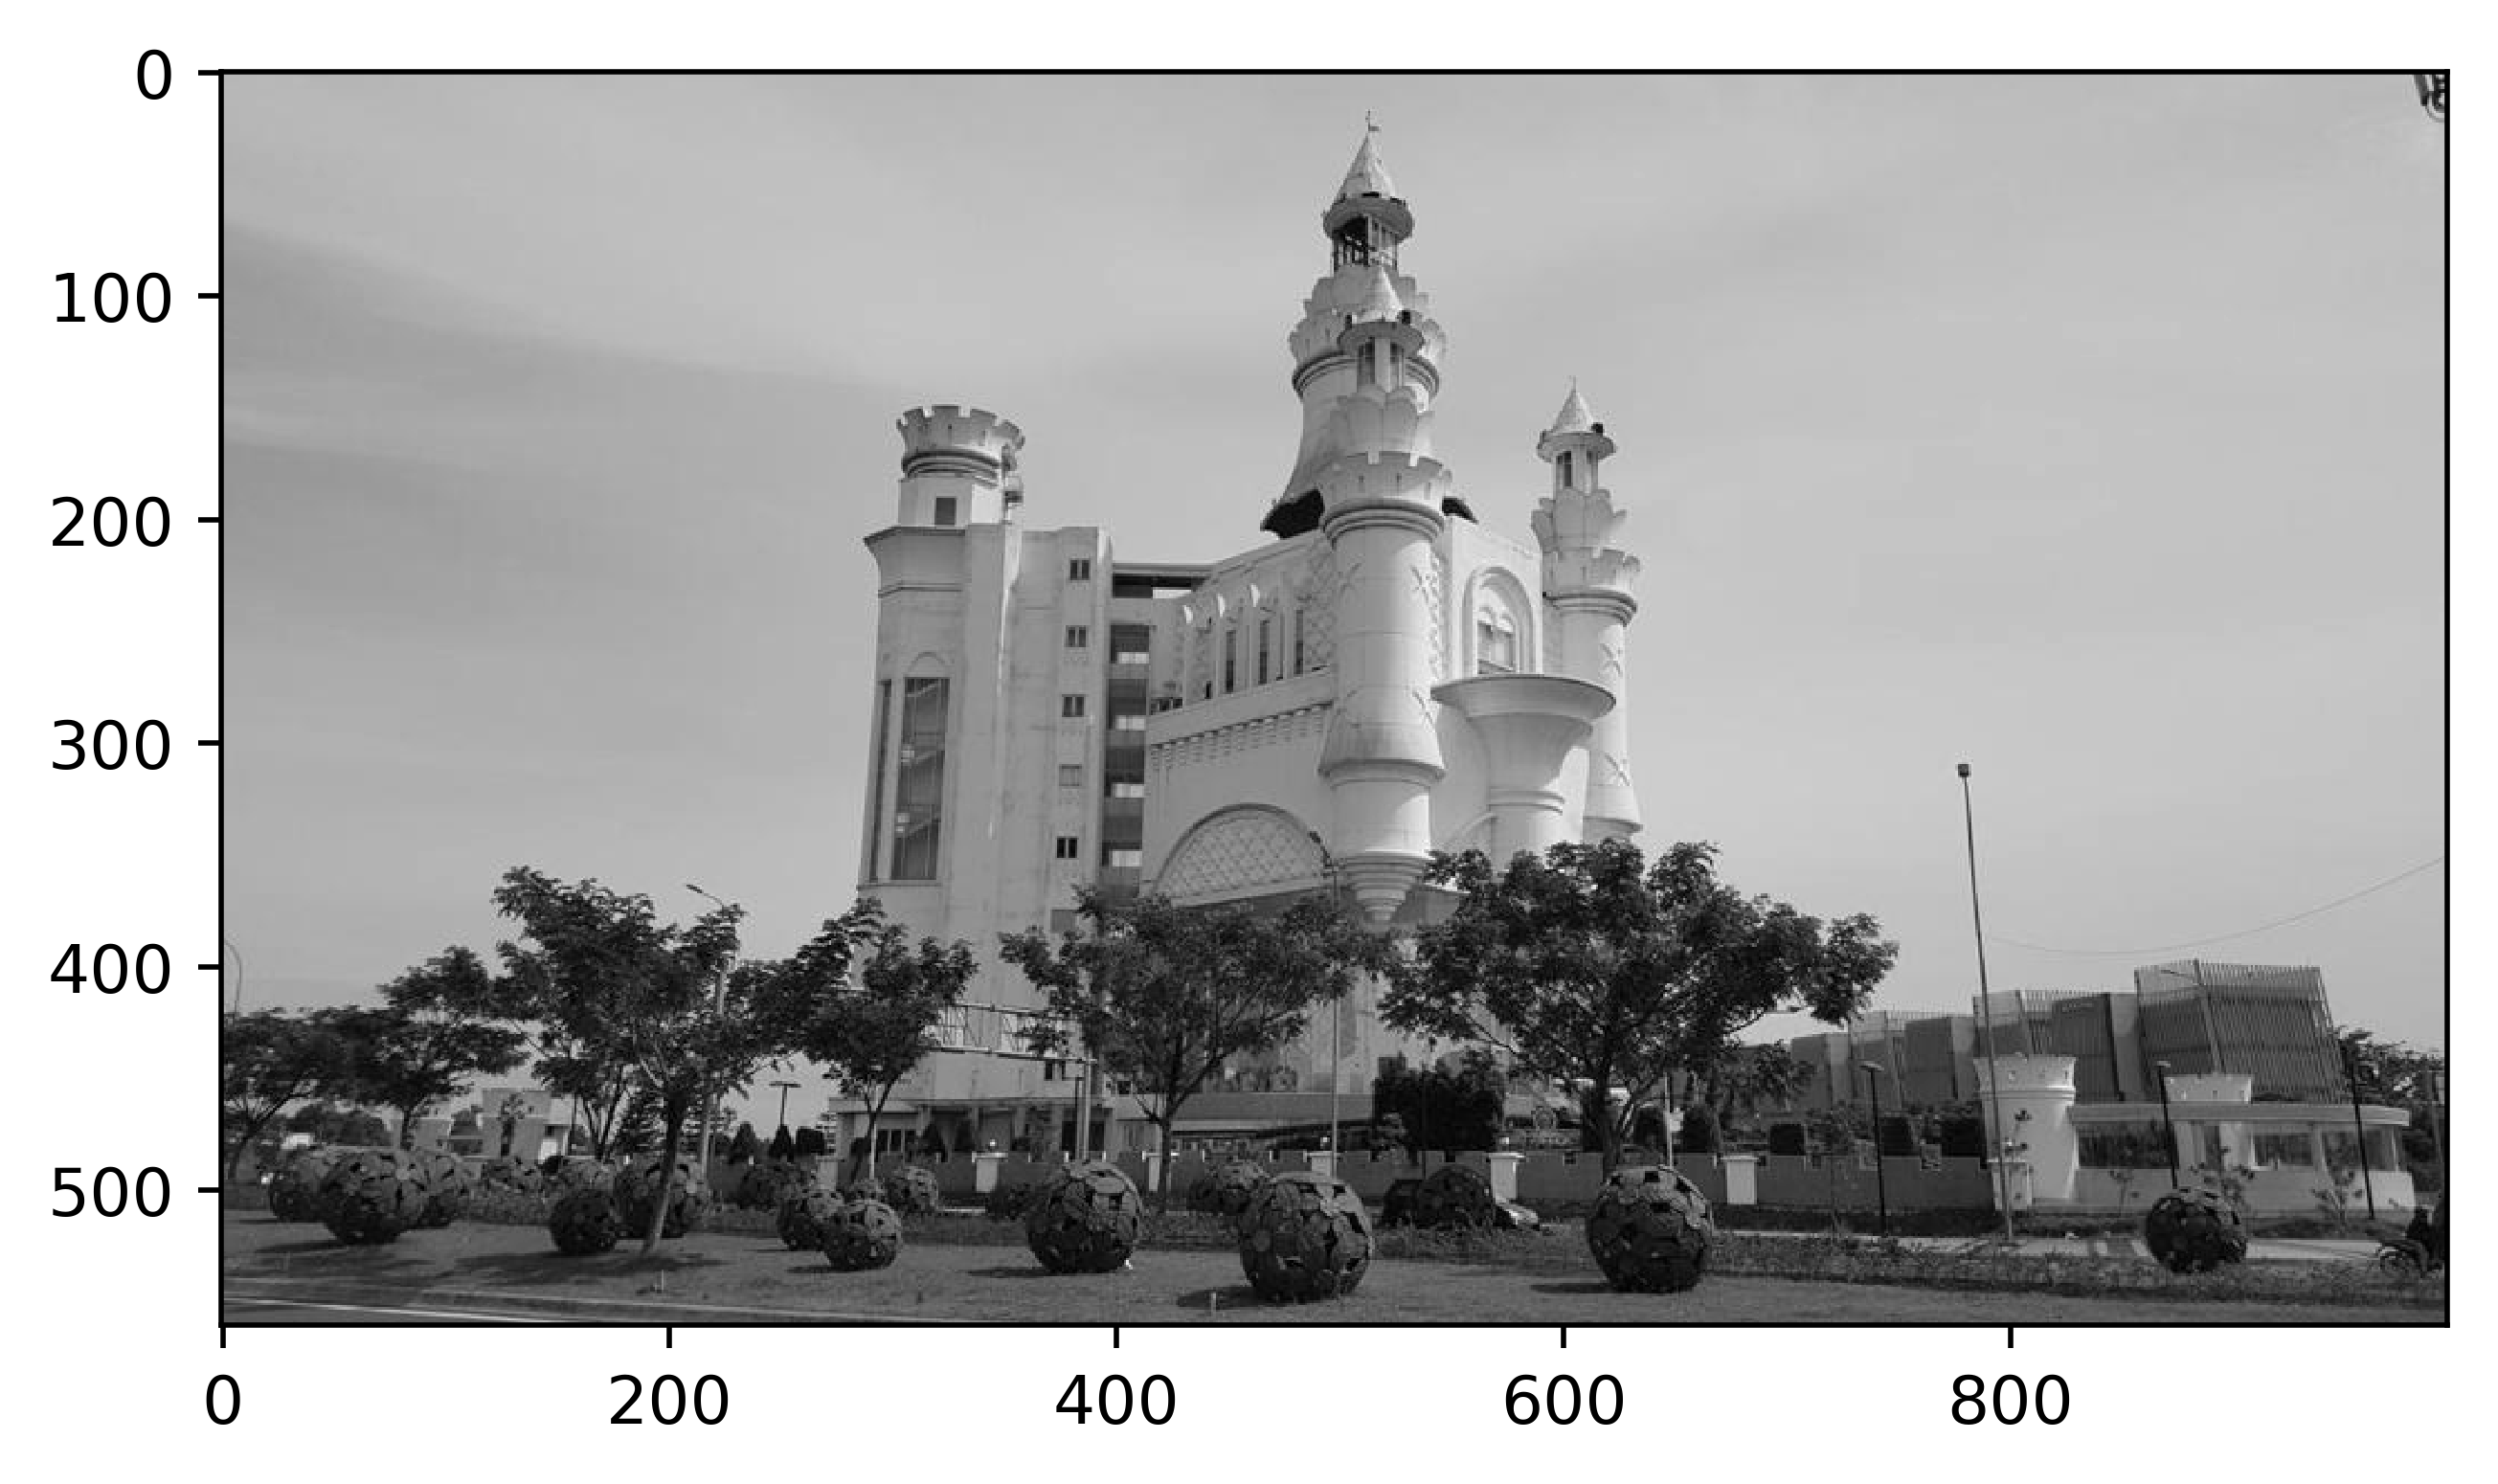

In [18]:
anh_goc = cv2.imread('./Anh nhieu/1g.jpg', 0)
plt.imshow(anh_goc, cmap='gray')

In [19]:
import math
from skimage import img_as_float
from skimage.measure import compare_mse as mse

MSE CỦA ẢNH NHIỄU BAN ĐẦU SO VỚI ẢNH GỐC

In [20]:
mse_noise = math.sqrt(mse(img_as_float(img), img_as_float(anh_goc)))
mse_noise

C:\Users\baole\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_mse has been moved to skimage.metrics.mean_squared_error. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.


0.24518400803101534

MSE CỦA ẢNH ĐÃ DENOISE BẰNG MEDIAN và mean FILTER SO VỚI ẢNH GỐC

In [21]:
mse_denoise = math.sqrt(mse(img_as_float(denoise), img_as_float(anh_goc)))
mse_denoise

C:\Users\baole\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_mse has been moved to skimage.metrics.mean_squared_error. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.


0.04419910864358805